<a href="https://colab.research.google.com/github/Reach5667/prueba_colab/blob/main/Actividad_1_Automobiles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importe y subida de archivos

In [ ]:
from google.colab import files
from IPython.display import Image
from google.colab import drive
import pandas as pd


1. **¿Qué es Supervised Machine Learning y cuáles son algunas de sus aplicaciones en Inteligencia de Negocios?**

El aprendizaje automático supervisado es una técnica de machine learning que emplea **datos etiquetados** para entrenar modelos capaces de realizar predicciones precisas. Estos modelos aprenden a asociar entradas específicas con salidas deseadas, lo que les permite generalizar a nuevos datos y tomar decisiones informadas.



2. **¿Cuáles son los principales algoritmos de Supervised Machine Learning? Brevemente describir con tus propias palarbas 5 – 7 de los principales algoritmos de Supervised Machine Learning.**


*  **Árboles de Decisión:** Utilizan una estructura similar a un árbol para ayudar a la toma de decisiones. Comienza en un nodo raíz y parten de ahí sus ramas con sus respectivas hojas, con cada rama representando una posible decisión basada en el valor de una característica. Al finalizar cada rama se encuentra su hoja, que representa la clase o categoría a la que pertenece cada dato. Este puede ser un modelo tanto de clasificación como de regresión, pero es más comúnmente utilizado para la clasificación.
*   **Redes Neuronales:** Las redes neuronales son un modelo principalmente inspirado en el cerebro humano, con el objetivo de replicar su manera de pensar y tomar decisiones. Junto con una validación cruzada efectiva, funcionan aprendiendo de los datos para identificar patrones y hacer predicciones. Son usualmente utilizadas para el reconocimiento de imágenes y el procesamiento de lenguaje natural.
*   **Regresión:** La regresión es una técnica estadística que busca la relación entre una variable de salida (dependiente) y una o más variables de entrada (independientes). Con un modelo de regresión, es posible estimar (y predecir) el valor de la variable de salida con base en los valores de las variables de entrada que se iincluyan. Por ejemplo, podemos utilizar la regresión para saber si una persona tiene una enfermedad cardíaca con base en sus niveles de colesterol, frecuencia cardíaca, edad, peso, y más factores.
*   **Árboles Aleatorios**: Los bosques aleatorios son un conjunto de árboles de decisión que, al combinarse, reducen el riesgo de sobreajuste. Esta técnica mejora la precisión de las predicciones al considerar múltiples perspectivas en la toma de decisiones.
*   **Máquinas de Vectores de Soporte (SVM):** Este modelo utiliza hiperplanos para separar datos de diferentes categorías. El objetivo es encontrar el hiperplano que maximiza la distancia entre los puntos de datos más cercanos de cada clase, conocido como margen. Las SVM son especialmente útiles para clasificar datos con muchas características, como imágenes y texto.


**3. ¿Qué es la R² Ajustada? ¿Qué es la métrica RMSE? ¿Cuál es la diferencia entre la R² Ajustada y la métrica RMSE?**

La R² se enfoca en la proporción de varianza explicada y penaliza la complejidad del modelo, y es generalmente utilizada para comparar modelos con diferentes números de predictores. Por otro lado, el RMSE se enfoca en el error promedio de las predicciones. Es útil para evaluar la precisión del modelo en términos de las unidades de la variable dependiente, y se interpreta de manera que los valores más bajos indican un mejor ajuste del modelo, ya que el error promedio es menor.

# Limpieza de datos

In [ ]:
df = pd.read_csv('automoble_insurance_claims.csv', encoding='ISO-8859-1')

Eliminar la columna *_c39*

In [ ]:
df = df.drop(['_c39'], axis=1)

Reemplazar todas las ? de la columna property_damage a YES

In [ ]:
df['property_damage'] = df['property_damage'].replace('?', 'YES')
df['property_damage'] = df['property_damage'].replace('YES',1)
df['property_damage'] = df['property_damage'].replace('NO',0)

# Yes = 1
# No = 0

Agrupar los niveles de educación a 3 niveles

In [ ]:
def agrupa_educacion(nivel):
  if nivel in ['JD', 'MD', 'PhD', 'Masters']:
    return 'Alto'
  elif nivel in ['Associate', 'College']:
    return 'Medio'
  else:
    return 'Bajo'

df['insured_education_level'] = df['insured_education_level'].apply(agrupa_educacion)
df['insured_education_level'] = df['insured_education_level'].replace('Alto', 1)
df['insured_education_level'] = df['insured_education_level'].replace('Medio', 2)
df['insured_education_level'] = df['insured_education_level'].replace('Bajo', 3)

# Alto = 1
# Medio = 2
# Bajo = 3

Agrupar los dias de la semana a Weekend and Weekday

In [ ]:
def agrupa_dias(fecha):
  dia_semana = pd.to_datetime(fecha).day_name()
  if dia_semana in ['Saturday', 'Sunday']:
    return 'Weekend'
  else:
    return 'Weekday'

df['policy_bind_date'] = df['policy_bind_date'].apply(agrupa_dias)
df['incident_date'] = df['incident_date'].apply(agrupa_dias)
df['policy_bind_date'] = df['policy_bind_date'].replace('Weekend', 1)
df['policy_bind_date'] = df['policy_bind_date'].replace('Weekday', 0)
df['incident_date'] = df['incident_date'].replace('Weekend', 1)
df['incident_date'] = df['incident_date'].replace('Weekday', 0)

#Weekend = 1
# Weekday = 0

Agrupar las horas del incidente a la clasificación mañana, tarde y noche

In [ ]:
def agrupa_horas(hora):
  if hora >= 5 and hora < 12:
    return 'mañana'
  elif hora >= 12 and hora < 19:
    return 'tarde'
  else:
    return 'noche'

df['incident_hour_of_the_day'] = df['incident_hour_of_the_day'].apply(agrupa_horas)
df['incident_hour_of_the_day'] = df['incident_hour_of_the_day'].replace('mañana', 1)
df['incident_hour_of_the_day'] = df['incident_hour_of_the_day'].replace('tarde', 2)
df['incident_hour_of_the_day'] = df['incident_hour_of_the_day'].replace('noche', 3)

# mañana = 1
# tarde = 2
# noche = 3

Reemplazar en las columnas police_report_available y property_damage los valores ? a NO

In [ ]:
df['police_report_available'] = df['police_report_available'].apply(lambda x: 'NO' if x != 'YES' else x)
df['property_damage'] = df['property_damage'].apply(lambda x: 'NO' if x != 'YES' else x)

df['police_report_available'] = df['police_report_available'].replace('YES', 1)
df['police_report_available'] = df['police_report_available'].replace('NO', 0)
df['property_damage'] = df['property_damage'].replace('YES', 1)
df['property_damage'] = df['property_damage'].replace('NO', 0)

# YES = 1
# NO = 0

Reemplazar en la columnas collusion_type los valores ? a Not detected

In [ ]:
def reemplaza_collision(valor):
  if valor not in ['NO', 'YES']:
    return 'Not detected'
  else:
    return valor

df['collision_type'] = df['collision_type'].apply(reemplaza_collision)
df['collision_type'] = df['collision_type'].replace('Not detected', 0)
df['collision_type'] = df['collision_type'].replace('Rear Collision', 1)

Remplazar en la columna

In [ ]:
def reemplaza_fraude(valor):
  if valor == 'Y':
    return 'YES'
  elif valor == 'N':
    return 'NO'
  else:
    return valor

df['fraud_reported'] = df['fraud_reported'].apply(reemplaza_fraude)
df['fraud_reported'] = df['fraud_reported'].replace('YES', 1)
df['fraud_reported'] = df['fraud_reported'].replace('NO', 0)

# YES = 1
# NO = 0



Cambiamos todos los valores de YES or NO a sistema binario

In [ ]:
for columna in df.columns:
  df[columna] = df[columna].apply(lambda x: 1 if x == 'YES' else (0 if x == 'NO' else x))


Clasificar todos los diferentes tipos de autos

In [ ]:
def clasifica_autos(modelo):
  if modelo in ['3 Series', 'E-Class', 'A5', 'A3', 'C-Class', 'X5', 'M5', '92x', '93', '95']:
    return 'Sedán'
  elif modelo in ['F150', 'Silverado', 'RAM', 'Tacoma', 'Wrangler', 'Escape', 'CRV', 'MDX', 'Highlander', 'Pathfinder']:
    return 'SUV'
  elif modelo in ['Civic', 'Corolla', 'Focus', 'Impreza', 'Elantra', 'Cruze', 'Jetta', 'Camry', 'Accord', 'Altima']:
    return 'Compacto'
  elif modelo in ['Mustang', 'Camaro', 'Challenger', 'Charger', 'Corvette', '911', 'Boxster', 'Cayman', 'TT', 'Z4']:
    return 'Deportivo'
  elif modelo in ['Malibu', 'Fusion', 'Legacy', 'Sonata', 'Optima', 'Passat', 'Mazda3', 'Mazda6']:
    return 'Familiar'
  elif modelo in ['Sierra', 'Tundra', 'Titan', 'F-250', 'Silverado 2500', 'RAM 2500']:
    return 'Pick-up'
  else:
    return 'Otros'

df['auto_model'] = df['auto_model'].apply(clasifica_autos)


Clasificamos los autos en 3 categorías:
*   Antiguo
*   Reciente
*   Moderno




In [ ]:
# Clasificamos los autos en 3 categorías: Antiguo, Reciente, Moderno utilizando auto_model y auto_year, esta informacion ponla en el data frame al lado derecho de auto_year

def clasifica_edad_auto(fila):
  modelo = fila['auto_model']
  año = fila['auto_year']

  if año < 2010:
    return 'Antiguo'
  elif año >= 2010 and año < 2015:
    return 'Reciente'
  else:
    return 'Moderno'

df['edad_auto'] = df.apply(clasifica_edad_auto, axis=1)

df['edad_auto'] = df['edad_auto'].replace('Antiguo', 1)
df['edad_auto'] = df['edad_auto'].replace('Reciente', 2)
df['edad_auto'] = df['edad_auto'].replace('Moderno', 3)

# ANTIGUO = 1
# RECIENTE = 2
# MODERNO = 3


In [ ]:
#  in the column auto_model change SedÃ¡n into Sedán

df['auto_model'] = df['auto_model'].replace('SedÃ¡n', 'Sedán')


Exporte de base de datos

In [ ]:
df.to_csv('data2.csv', index=False)

Dividr los data frame en objeto y número

In [ ]:
df_texto = df.select_dtypes(include=['object'])
df_numerico = df.select_dtypes(include=['number'])

# Análisis Exploratorio
El presente análisis exploratorio tiene como objetivo fundamental sentar las bases para el desarrollo de modelos de machine learning predictivos en el ámbito de los seguros de automóviles. A través de un estudio detallado de la base de datos, se busca identificar patrones, tendencias y relaciones ocultas entre las variables, lo que permitirá comprender mejor la dinámica de los siniestros y los factores que influyen en el costo de las reparaciones.

# Medidas descriptivas

Las medidas descriptivas son herramientas estadísticas que nos permiten resumir y entender grandes conjuntos de datos. Actúan como un tipo de resumen que ofrece una visión general clara y concisa sobre la información que se está analizando.

A primera instancia y con base en los datos obtenidos, se puede concluir que el promedio de las personas llamando o solicitando un seguro de autómovil tienen 39 años, llevan alrededor de 17 años de ser clientes del seguro.

In [ ]:
df_limpio = pd.read_csv('data2.csv')

In [ ]:
df_texto = df_limpio.select_dtypes(include=['object'])
df_numerico = df_limpio.select_dtypes(include=['number'])

In [ ]:
descriptivas_numericas = df_numerico.describe(include='all')

tabla_descriptivas = pd.DataFrame({
    'Variable': descriptivas_numericas.columns,
    'Media': descriptivas_numericas.loc['mean'],
    'Mediana': descriptivas_numericas.loc['50%'],
    'Moda': df_numerico.mode().iloc[0]
})

print(tabla_descriptivas)


                                                Variable         Media  \
months_as_customer                    months_as_customer  2.039540e+02   
age                                                  age  3.894800e+01   
policy_number                              policy_number  5.462386e+05   
policy_bind_date                        policy_bind_date  3.010000e-01   
policy_deductable                      policy_deductable  1.136000e+03   
policy_annual_premium              policy_annual_premium  1.256406e+03   
umbrella_limit                            umbrella_limit  1.101000e+06   
insured_zip                                  insured_zip  5.012145e+05   
insured_education_level          insured_education_level  1.587000e+00   
capital-gains                              capital-gains  2.512610e+04   
capital-loss                                capital-loss -2.679370e+04   
incident_date                              incident_date  2.980000e-01   
collision_type                        

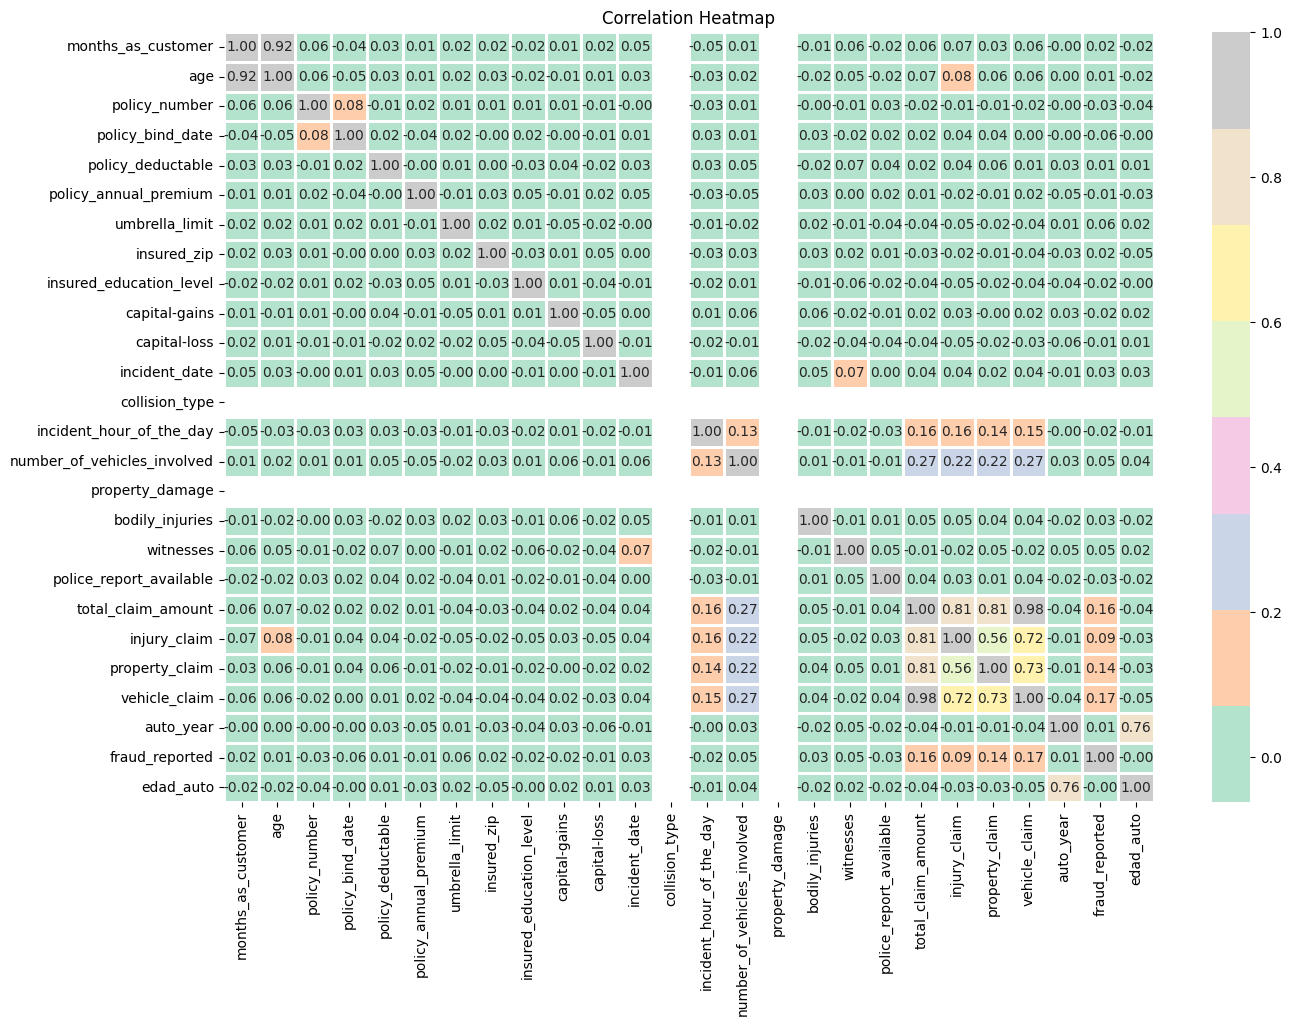

In [ ]:
# Análisis de correlación
plt.figure(figsize=(15, 10))

# Using library Seaborn to create a correlation heatmap
sns.heatmap(df_numerico.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()


A primera instancia, las variables que presentan una mayor correlación con la variable explicativa total_claim_amounts son:
- fraud_reported
-  

# Medidas de dispersión

Se observa una gran variabilidad en aspectos como la antigüedad de los clientes, el monto de las primas y los costos de los siniestros. Las variables relacionadas con el vehículo, como el año y el número de vehículos involucrados, muestran una menor dispersión. Además, se incluyen variables categóricas como la presencia de daños a la propiedad o lesiones corporales. Estos datos servirán como base para análisis más profundos y la construcción de modelos predictivos.

In [ ]:
rango_num = df_numerico.max() - df_numerico.min()
varianza_num = df_numerico.var()
desviacion_estandar_num = df_numerico.std()

medidas_dispersion = pd.DataFrame({
    'Rango': rango_num,
    'Varianza': varianza_num,
    'Desviación Estándar': desviacion_estandar_num
})
display(medidas_dispersion)


,Rango,Varianza,Desviación Estándar
months_as_customer,479.00,1.325104e+04,1.151132e+02
age,45.00,8.354484e+01,9.140287e+00
policy_number,898631.00,6.608139e+10,2.570630e+05
policy_bind_date,1.00,2.106096e-01,4.589222e-01
policy_deductable,1500.00,3.743784e+05,6.118647e+02
policy_annual_premium,1614.26,5.961772e+04,2.441674e+02
umbrella_limit,11000000.00,5.278077e+12,2.297407e+06
insured_zip,190858.00,5.141121e+09,7.170161e+04
insured_education_level,2.00,5.629940e-01,7.503293e-01
capital-gains,100500.00,7.768588e+08,2.787219e+04


# Boxplots

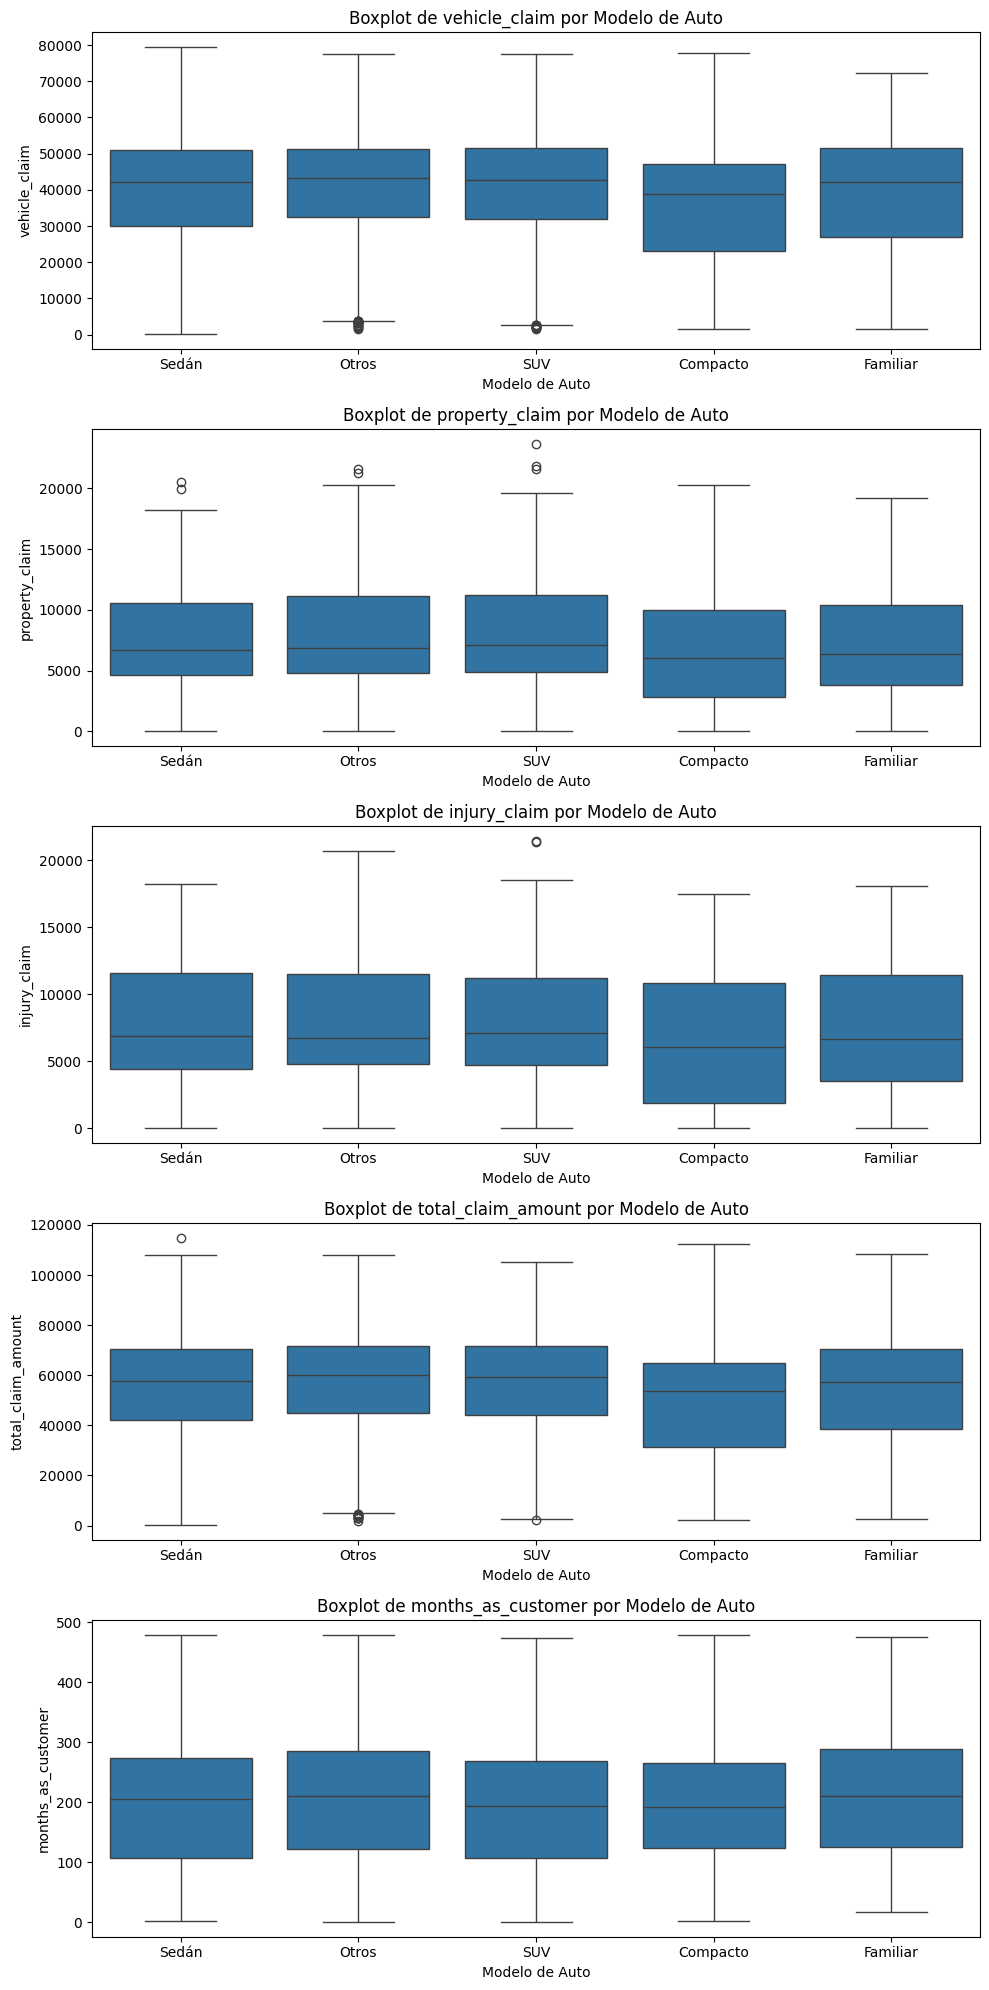

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las columnas numéricas relevantes
columnas_numericas = ['vehicle_claim', 'property_claim', 'injury_claim', 'total_claim_amount', 'months_as_customer']

fig, axes = plt.subplots(nrows=len(columnas_numericas), ncols=1, figsize=(10, 20))

for i, columna in enumerate(columnas_numericas):
  sns.boxplot(x='auto_model', y=columna, data=df, ax=axes[i])
  axes[i].set_title(f'Boxplot de {columna} por Modelo de Auto')
  axes[i].set_xlabel('Modelo de Auto')
  axes[i].set_ylabel(columna)

plt.tight_layout()
plt.show()


**Hallazgos Boxplot**

El análisis de los datos de reclamos revela que los vehículos compactos presentan la menor frecuencia de siniestros y, cuando ocurren, los costos de reparación suelen ser inferiores al promedio. Por otro lado, los SUV destacan por una mayor incidencia de reclamos por daños a terceros, con montos que superan en un 20% el promedio general. En cuanto al costo total de los siniestros, tanto los SUV como otros modelos de mayor tamaño suelen generar reclamos superiores a los 60,000 pesos, mientras que los sedanes y familiares se ubican ligeramente por debajo de este umbral

# Histogramas

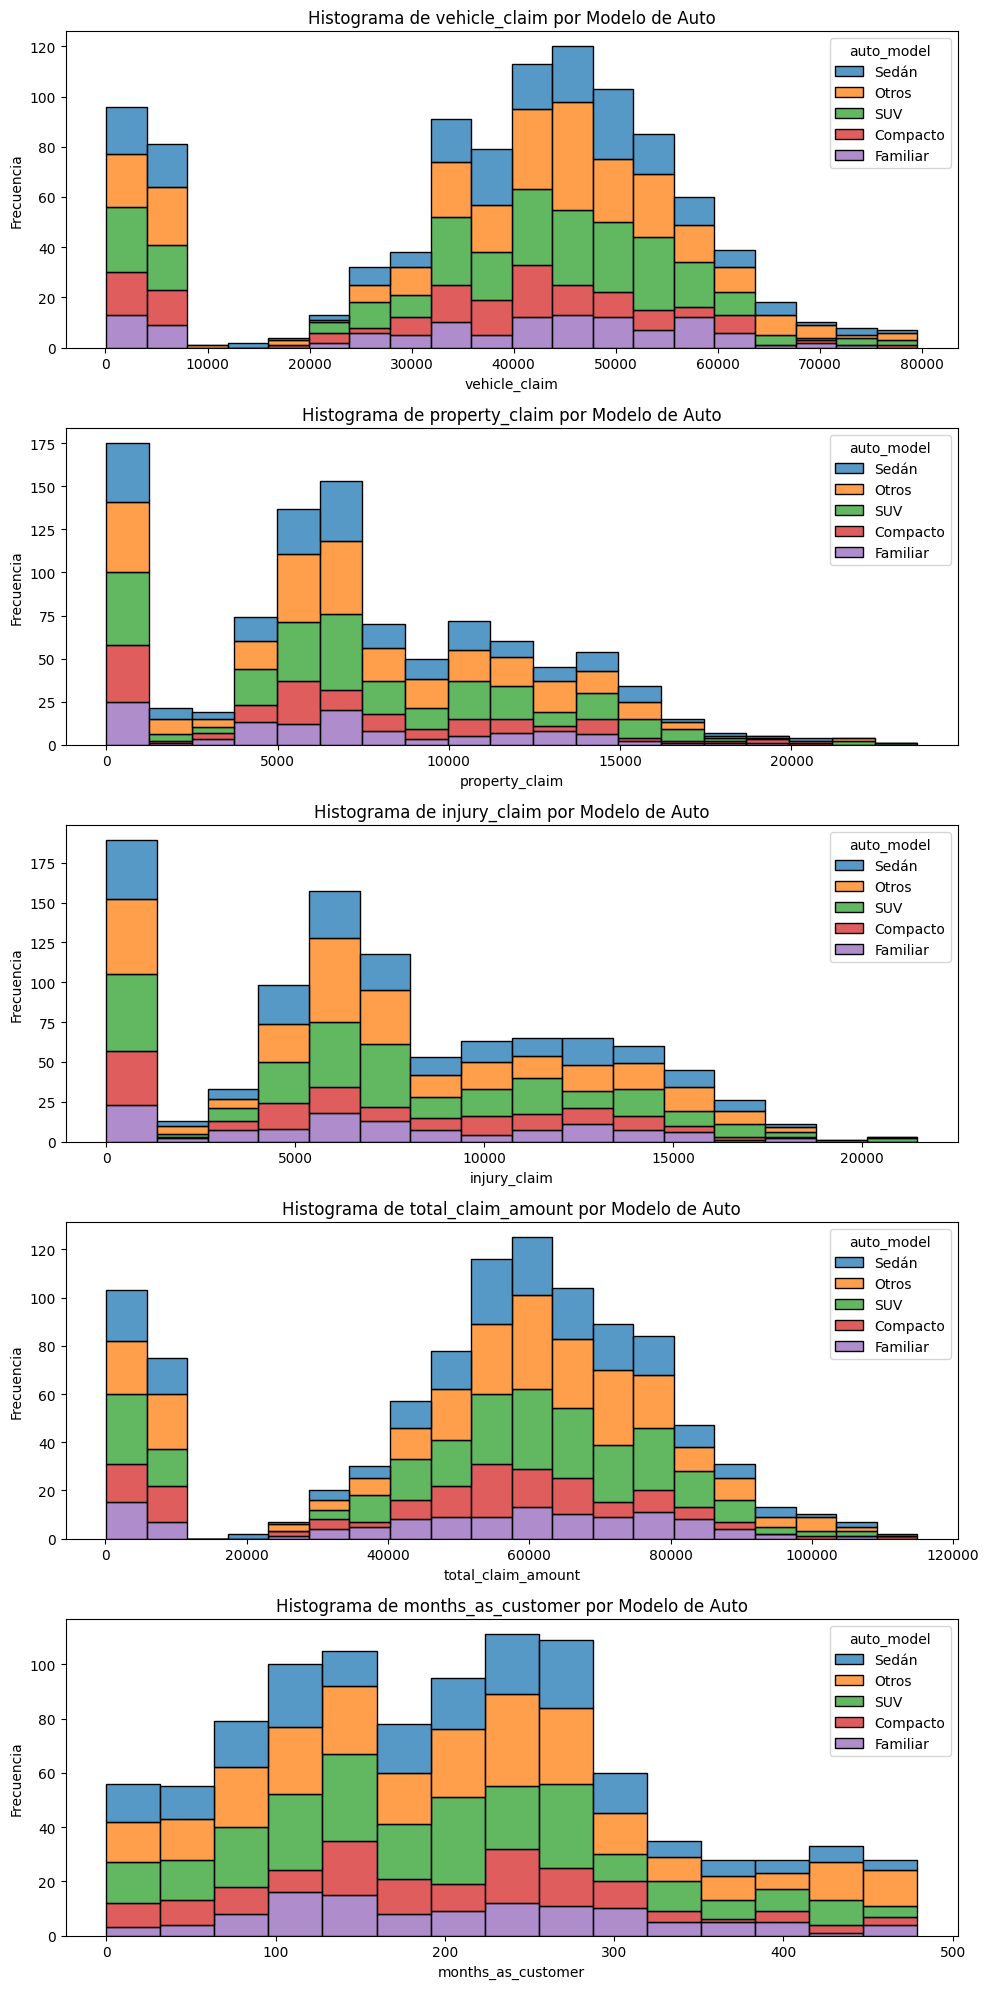

In [ ]:
# Seleccionar las columnas numéricas relevantes
columnas_numericas = ['vehicle_claim', 'property_claim', 'injury_claim', 'total_claim_amount', 'months_as_customer']

fig, axes = plt.subplots(nrows=len(columnas_numericas), ncols=1, figsize=(10, 20))

for i, columna in enumerate(columnas_numericas):
  sns.histplot(x=columna, data=df, hue='auto_model', ax=axes[i], multiple='stack')
  axes[i].set_title(f'Histograma de {columna} por Modelo de Auto')
  axes[i].set_xlabel(columna)
  axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

**Hallazgos Histograma**

Los datos revelan que los vehículos SUV presentan la mayor frecuencia de reclamos por daños al vehículo, concentrándose en un rango de entre 40,000 y 50,000 pesos.

Asimismo, se ha identificado una tendencia en los reclamos según la antigüedad de la póliza. Los asegurados con una antigüedad de entre 220 y 280 meses presentan la mayor incidencia de siniestros, seguido de un grupo menor con una antigüedad de entre 100 y 150 meses. Por el contrario, los clientes con pólizas superiores a 300 meses muestran una menor probabilidad de sufrir accidentes.

Los modelos analizados indican una correlación entre los reclamos por daños a propiedad y los reclamos por lesiones, con un monto promedio por este último tipo de reclamo inferior a 10,000 pesos.

### Especificacion del Modelo e Hipotesis

### Modelo de Regresión y Variable Dependiente Seleccionada
Con base en los hallazgos del análisis exploratorio, el Precio Total del Reclamo (total_claim_amount) ha sido seleccionado como la variable objetivo de este proyecto. A través del desarrollo de un modelo predictivo robusto, se busca optimizar el proceso de valoración de los reclamos al seguro, ofreciendo a los clientes estimaciones más precisas y oportunas.

# Modelos de Supervised Machine Learning
A continuación se presentan los modelos de Machine Learning para su evaluación y aceptación para predecir la variable dependiente.

In [ ]:
# Carga de paquetería
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, RepeatedStratifiedKFold
import sklearn
from sklearn.model_selection import train_test_split
from statsmodels.compat import lzip
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

**Especificación de variables**

In [ ]:
# Abrimos el archivo limpio delimitado por comas
df_limpio = pd.read_csv('data2.csv')


In [ ]:
#df_limpio = pd.DataFrame([df], index=[0])
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   int64  
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   int64  
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

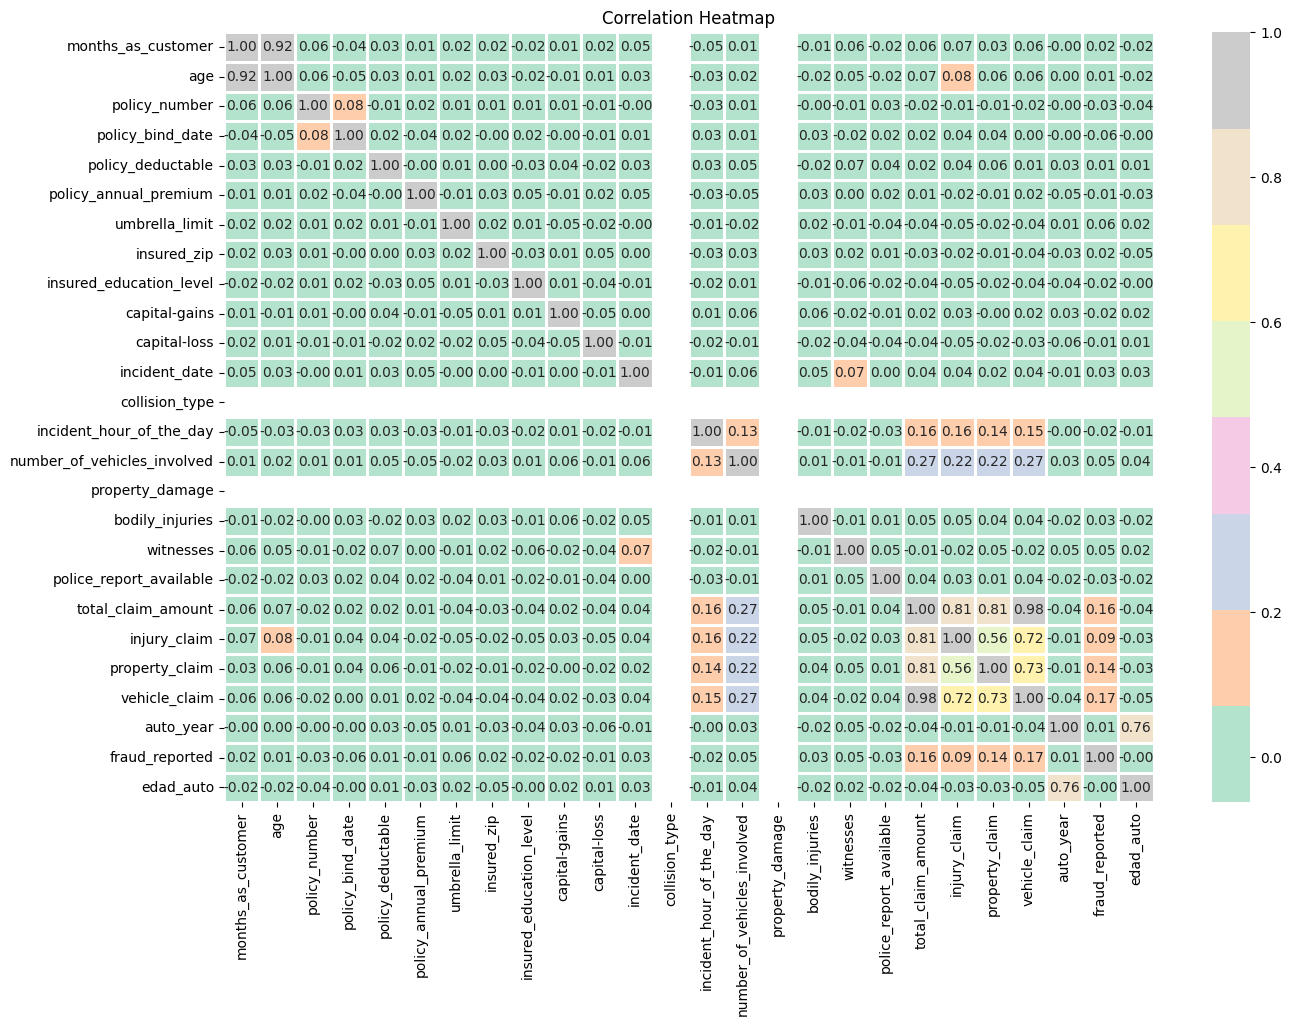

In [ ]:
# Análisis de correlación
plt.figure(figsize=(15, 10))

# Using library Seaborn to create a correlation heatmap
sns.heatmap(df_numerico.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()


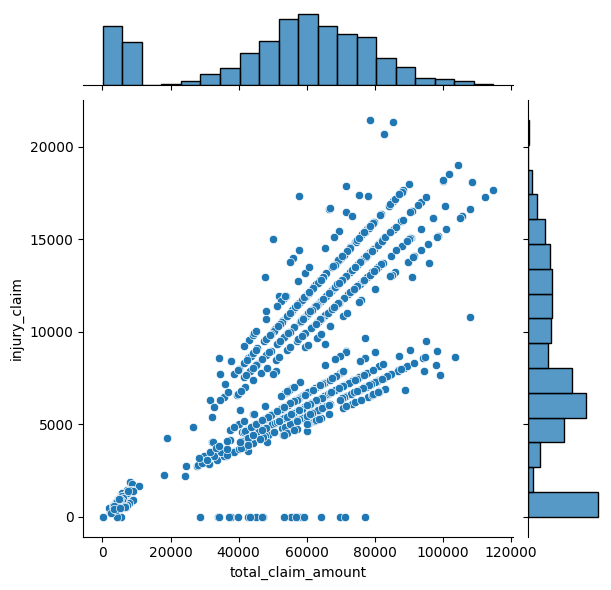

In [ ]:
# Regresión entre una variable independiente y nuestra variable dependiente
sns.jointplot(data=df_numerico, x='total_claim_amount', y='injury_claim')

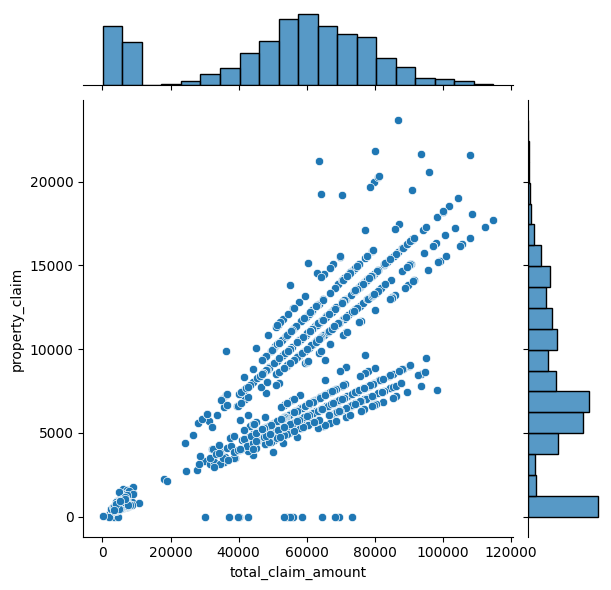

In [ ]:
# Relación entre una variable independiente y nuestra variable dependiente
sns.jointplot(data=df_numerico, x='total_claim_amount', y='property_claim')

In [ ]:
X = df_limpio[['injury_claim','police_report_available','umbrella_limit','edad_auto','number_of_vehicles_involved','incident_date']]
Y = df_limpio[['total_claim_amount']]

Estimación de Modelo de Regresión

In [ ]:
reg_model_1 = sm.OLS(Y,X).fit()

In [ ]:
reg_model_1a = smf.ols(formula = 'total_claim_amount ~ umbrella_limit+edad_auto + police_report_available + injury_claim + incident_date + number_of_vehicles_involved', data=df_limpio).fit()
print(reg_model_1a.summary())

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     318.6
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          2.04e-227
Time:                        20:59:08   Log-Likelihood:                -11063.
No. Observations:                1000   AIC:                         2.214e+04
Df Residuals:                     993   BIC:                         2.217e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [ ]:
df_numerico.var()

,0
months_as_customer,1.325104e+04
age,8.354484e+01
policy_number,6.608139e+10
policy_bind_date,2.106096e-01
policy_deductable,3.743784e+05
policy_annual_premium,5.961772e+04
umbrella_limit,5.278077e+12
insured_zip,5.141121e+09
insured_education_level,5.629940e-01
capital-gains,7.768588e+08


In [ ]:
# RMSE OLS
OLS_pred = reg_model_1a.predict(df_limpio)
OLS_rmse = mean_squared_error(y_true = Y, y_pred = OLS_pred, squared = False)
OLS_rmse

15429.780985918575

Tenemos un RMSE muy alto, lo que se puede deber a los valores atípicos encontrados en la variable dependiente, como se puede ver en el histograma a continuación.

In [ ]:
# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF = pd.DataFrame()
VIF['Explanatory Variables'] = X.columns
VIF['VIF'] = [variance_inflation_factor(X.values,i) for i  in range(X.shape[1])]
VIF['VIF'] = round(VIF['VIF'],2)
VIF = VIF.sort_values(by = "VIF", ascending = False)
VIF

,Explanatory Variables,VIF
4,number_of_vehicles_involved,3.79
3,edad_auto,3.64
0,injury_claim,3.08
5,incident_date,1.41
1,police_report_available,1.40
2,umbrella_limit,1.20


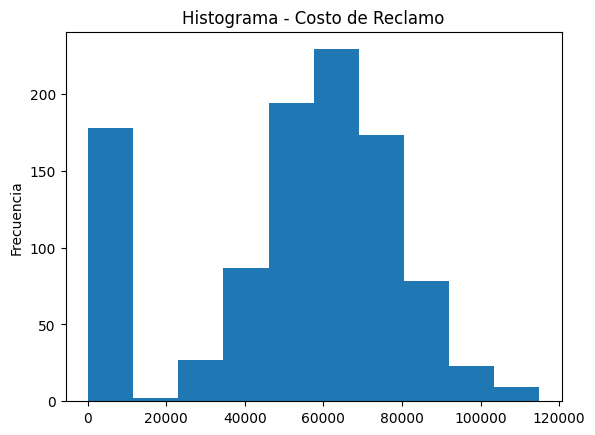

In [ ]:
# the dependent variable is right - skewed
plt.hist(df_limpio['total_claim_amount'])
plt.title("Histograma - Costo de Reclamo")
plt.ylabel("Frecuencia")
plt.show()

Por lo tanto, haremos un modelo de dos partes para predecir la probabilidad de tener un reclamo de $0 (como lo dicen los datos atípicos), y  luego, para aquellos con reclamos distintos de 0, se predecirá el monto del reclamo.

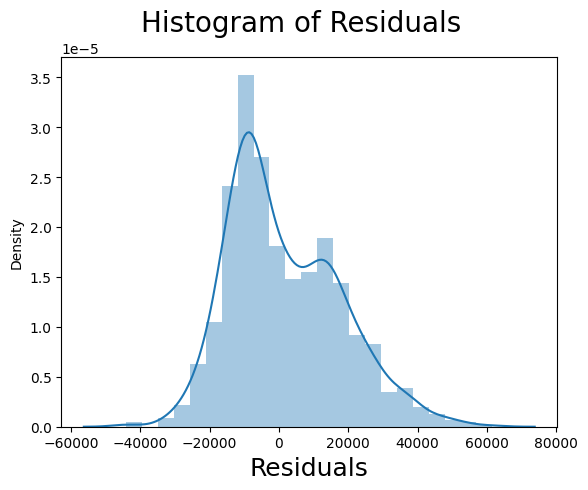

In [ ]:
# Check Normality of Estimated Regression Residuals
# print(reg_model_1.summary())
Y_predicted = reg_model_1.predict(X)
residuals_reg_model_1 = df_limpio.total_claim_amount - Y_predicted

# Plot the histogram of Estimated Regression Residuals
fig = plt.figure()
sns.distplot((residuals_reg_model_1))
fig.suptitle('Histogram of Residuals', fontsize = 20)
plt.xlabel('Residuals', fontsize = 18)
plt.show()

In [ ]:
# Check Normality of Estimated Regression Residuals
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sm.stats.jarque_bera(reg_model_1a.resid)
lzip(name, test)

[('Jarque-Bera', 53.721407186941164),
 ('Chi^2 two-tail prob.', 2.1604521369603395e-12),
 ('Skew', 0.5539427475210946),
 ('Kurtosis', 2.7511958554169342)]

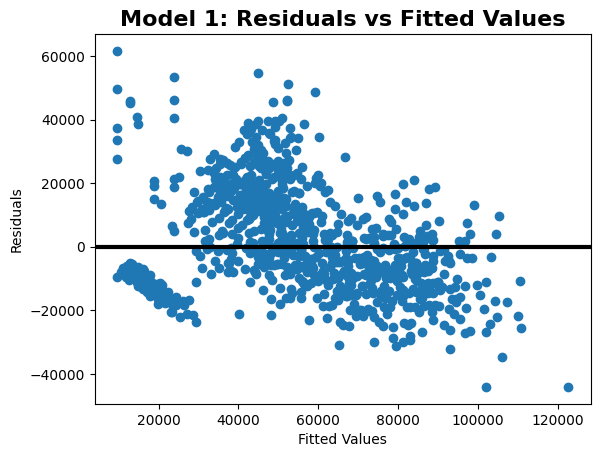

In [ ]:
# Check variance of residuals
plt.scatter(Y_predicted, residuals_reg_model_1)
plt.axhline(y=0, color='black', linestyle='-', linewidth=3)
plt.title('Model 1: Residuals vs Fitted Values', fontsize=16, weight='bold')
plt.xlabel('Fitted Values', fontsize = 10)
plt.ylabel('Residuals', fontsize = 10)
plt.show()

# Modelo RIDGE



In [ ]:
# RIDGE Regression
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=0.075)
ridgereg.fit(X, Y)
RIDGE_pred = ridgereg.predict(X)
ridgereg.score(X,Y) # R-Squared

0.6581026463702107

De acuerdo con nuestra R-squared obtenida, nuestro modelo RIDGE explica aproximadamente el 65.8% de la varianza de nuestra variable independiente. Por ahora, el resultado es muy similar a nuestro modelo de regresión lineal.

**RMSE de RIDGE**

Igualmente, tuvimos resultados del RMSE similares con nuestro modelo de RIDGE en comparación con nuestro modelo de regresión.

In [ ]:
RIDGE_rmse = mean_squared_error(y_true = Y, y_pred = RIDGE_pred, squared = False)
RIDGE_rmse

15429.780988623112

El modelo de RIDGE minimizó las variables de injury_claim y umbrella_limit hasta llegar a cero o cercano al mismo, debido a que no tienen un nivel de correlación muy alto conforme a nuestra variable dependiente.

In [ ]:
coeff_RIDGE = pd.DataFrame(X.columns, columns=['Features'])
coeff_RIDGE['Coefficient Estimate'] = Series(ridgereg.coef_[0])
coeff_RIDGE

,Features,Coefficient Estimate
0,injury_claim,4.226247
1,police_report_available,800.106209
2,umbrella_limit,-0.000018
3,edad_auto,-1137.122277
4,number_of_vehicles_involved,2571.495100
5,incident_date,396.107336


La mayoría de las variables tiene un impacto positivo en nuestra variable dependiente, siendo la variable con más impacto number_of_vehicles_involved. Mientras tanto, la variable edad_auto tiene impacto negativo medianamente fuerte en nuestra variable predictora.

<Axes: title={'center': 'Ridge Estimated Coefficients'}>

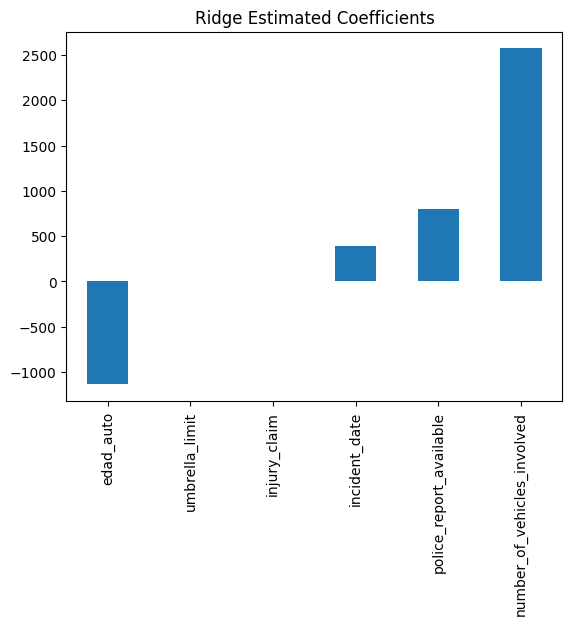

In [ ]:
predictors = X.columns
coef_ridge = Series(ridgereg.coef_[0], predictors).sort_values()
coef_ridge.plot(kind='bar', title='Ridge Estimated Coefficients')

Volvimos a correr nuestro diagnóstico de multicolinearidad para corroborar que ninguna de nuestras variables estuviera relacionada con otra.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_limpio[['injury_claim','police_report_available','umbrella_limit','edad_auto','number_of_vehicles_involved','incident_date']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                       feature       VIF
0                 injury_claim  3.080203
1      police_report_available  1.397971
2               umbrella_limit  1.204870
3                    edad_auto  3.639957
4  number_of_vehicles_involved  3.790293
5                incident_date  1.410179


In [ ]:
# Correr el modelo sin los datos eliminados por Ridge
X2 = df_limpio[['police_report_available','edad_auto','number_of_vehicles_involved','incident_date']]
Y = df_limpio[['total_claim_amount']]
# RIDGE Regression
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=0.075)
ridgereg.fit(X2, Y)
RIDGE_pred = ridgereg.predict(X2)
ridgereg.score(X2,Y) # R-Squared

0.08000483701187155

Parece que al eliminar las variables que Ridge minimizó, nuestra R-squared baja considerablemente, por lo que no es recomendable eliminar estas variables.

# Modelo LASSO

In [ ]:
# Regresión LASSO
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.075)
lassoreg.fit(X, Y)
LASSO_pred = lassoreg.predict(X)
lassoreg.score(X,Y)

0.6581026463795643

Obtuvimos el mismo R-squared que en los modelos pasados.

In [ ]:
lassoreg.coef_

array([ 4.22624198e+00,  8.00039543e+02, -1.83273630e-05, -1.13715889e+03,
        2.57162114e+03,  3.95877020e+02])

In [ ]:
coeff_LASSO_table = pd.DataFrame(lassoreg.coef_, X.columns, columns=['Coefficient Estimate'])
coeff_LASSO_table.head()

,Coefficient Estimate
injury_claim,4.226242
police_report_available,800.039543
umbrella_limit,-0.000018
edad_auto,-1137.158895
number_of_vehicles_involved,2571.621138


LASSO redujo a cero la variable umbrella_limit, lo que significa que esta variable tiene menos importancia a nuestro modelo y puede ser descartada.

In [ ]:
LASSO_rmse = mean_squared_error(y_true = Y, y_pred = LASSO_pred, squared = False)
LASSO_rmse

15429.780988412047

Nuestro RMSE resultó ser igual que en nuestros modelos anteriores.

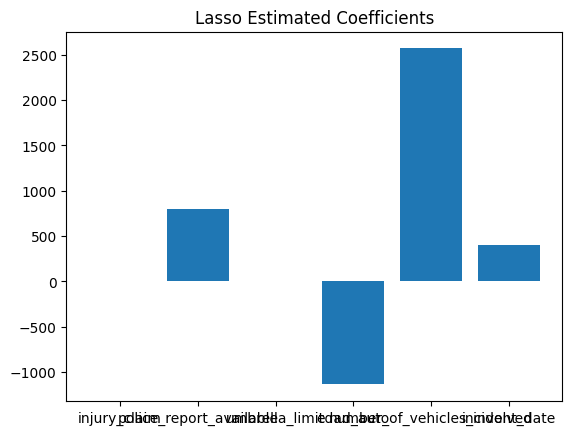

In [ ]:
# Coeficientes estimados por LASSO
plt.bar(coeff_LASSO_table.index, coeff_LASSO_table['Coefficient Estimate'])
plt.title("Lasso Estimated Coefficients")
plt.show()

In [ ]:
# Correr el modelo sin los datos eliminados por Ridge
X_lasso = df_limpio[['injury_claim','police_report_available','edad_auto','number_of_vehicles_involved']]
Y = df_limpio[['total_claim_amount']]
# RIDGE Regression
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=0.075)
ridgereg.fit(X2, Y)
RIDGE_pred = ridgereg.predict(X2)
ridgereg.score(X2,Y) # R-Squared

0.08000483701187155

Parece que al eliminar las variables que Ridge minimizó, nuestra R-squared baja considerablemente, por lo que no es recomendable eliminar estas variables.

# Polynomial Regression

In [ ]:
### Polynomial Regression Model
from sklearn.preprocessing import PolynomialFeatures
polynomial_X = PolynomialFeatures(degree=2, include_bias=False)
X_polynomial = polynomial_X.fit_transform(df_numerico)
X_polynomial = pd.DataFrame(X_polynomial, columns=polynomial_X.get_feature_names_out(df_numerico.columns))
X_polynomial.head(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_education_level,capital-gains,...,vehicle_claim^2,vehicle_claim auto_year,vehicle_claim fraud_reported,vehicle_claim edad_auto,auto_year^2,auto_year fraud_reported,auto_year edad_auto,fraud_reported^2,fraud_reported edad_auto,edad_auto^2
0,328.0,48.0,521585.0,0.0,1000.0,1406.91,0.0,466132.0,1.0,53300.0,...,2.712326e+09,104368320.0,52080.0,52080.0,4016016.0,2004.0,2004.0,1.0,1.0,1.0
1,228.0,42.0,342868.0,0.0,2000.0,1197.22,5000000.0,468176.0,1.0,0.0,...,1.232010e+07,7044570.0,3510.0,3510.0,4028049.0,2007.0,2007.0,1.0,1.0,1.0
2,134.0,29.0,687698.0,0.0,2000.0,1413.14,5000000.0,430632.0,1.0,35100.0,...,5.336100e+08,46361700.0,0.0,23100.0,4028049.0,0.0,2007.0,0.0,0.0,1.0
3,256.0,41.0,227811.0,0.0,2000.0,1415.74,6000000.0,608117.0,1.0,48900.0,...,2.572518e+09,102150080.0,50720.0,101440.0,4056196.0,2014.0,4028.0,1.0,2.0,4.0
4,228.0,44.0,367455.0,0.0,1000.0,1583.91,6000000.0,610706.0,2.0,66000.0,...,2.070250e+07,9140950.0,0.0,4550.0,4036081.0,0.0,2009.0,0.0,0.0,1.0


In [ ]:
polynomial_data = pd.concat([X_polynomial], axis=1)
Total_Claim_Amount = df_limpio[['total_claim_amount']]
polynomial_data.insert(0,"Total Claim Amount", Total_Claim_Amount)
polynomial_data.head(5)

,Total Claim Amount,months_as_customer,age,policy_number,policy_bind_date,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_education_level,...,vehicle_claim^2,vehicle_claim auto_year,vehicle_claim fraud_reported,vehicle_claim edad_auto,auto_year^2,auto_year fraud_reported,auto_year edad_auto,fraud_reported^2,fraud_reported edad_auto,edad_auto^2
0,71610,328.0,48.0,521585.0,0.0,1000.0,1406.91,0.0,466132.0,1.0,...,2.712326e+09,104368320.0,52080.0,52080.0,4016016.0,2004.0,2004.0,1.0,1.0,1.0
1,5070,228.0,42.0,342868.0,0.0,2000.0,1197.22,5000000.0,468176.0,1.0,...,1.232010e+07,7044570.0,3510.0,3510.0,4028049.0,2007.0,2007.0,1.0,1.0,1.0
2,34650,134.0,29.0,687698.0,0.0,2000.0,1413.14,5000000.0,430632.0,1.0,...,5.336100e+08,46361700.0,0.0,23100.0,4028049.0,0.0,2007.0,0.0,0.0,1.0
3,63400,256.0,41.0,227811.0,0.0,2000.0,1415.74,6000000.0,608117.0,1.0,...,2.572518e+09,102150080.0,50720.0,101440.0,4056196.0,2014.0,4028.0,1.0,2.0,4.0
4,6500,228.0,44.0,367455.0,0.0,1000.0,1583.91,6000000.0,610706.0,2.0,...,2.070250e+07,9140950.0,0.0,4550.0,4036081.0,0.0,2009.0,0.0,0.0,1.0


In [ ]:
column_names = polynomial_data.columns
print(column_names)

Index(['Total Claim Amount', 'months_as_customer', 'age', 'policy_number',
       'policy_bind_date', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_education_level',
       ...
       'vehicle_claim^2', 'vehicle_claim auto_year',
       'vehicle_claim fraud_reported', 'vehicle_claim edad_auto',
       'auto_year^2', 'auto_year fraud_reported', 'auto_year edad_auto',
       'fraud_reported^2', 'fraud_reported edad_auto', 'edad_auto^2'],
      dtype='object', length=378)


In [ ]:
polynomial_data.rename(columns = {'edad_auto^2':'edad_auto_sqr'}, inplace = True)
polynomial_data.head(5)

,Total Claim Amount,months_as_customer,age,policy_number,policy_bind_date,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_education_level,...,vehicle_claim^2,vehicle_claim auto_year,vehicle_claim fraud_reported,vehicle_claim edad_auto,auto_year^2,auto_year fraud_reported,auto_year edad_auto,fraud_reported^2,fraud_reported edad_auto,edad_auto_sqr
0,71610,328.0,48.0,521585.0,0.0,1000.0,1406.91,0.0,466132.0,1.0,...,2.712326e+09,104368320.0,52080.0,52080.0,4016016.0,2004.0,2004.0,1.0,1.0,1.0
1,5070,228.0,42.0,342868.0,0.0,2000.0,1197.22,5000000.0,468176.0,1.0,...,1.232010e+07,7044570.0,3510.0,3510.0,4028049.0,2007.0,2007.0,1.0,1.0,1.0
2,34650,134.0,29.0,687698.0,0.0,2000.0,1413.14,5000000.0,430632.0,1.0,...,5.336100e+08,46361700.0,0.0,23100.0,4028049.0,0.0,2007.0,0.0,0.0,1.0
3,63400,256.0,41.0,227811.0,0.0,2000.0,1415.74,6000000.0,608117.0,1.0,...,2.572518e+09,102150080.0,50720.0,101440.0,4056196.0,2014.0,4028.0,1.0,2.0,4.0
4,6500,228.0,44.0,367455.0,0.0,1000.0,1583.91,6000000.0,610706.0,2.0,...,2.070250e+07,9140950.0,0.0,4550.0,4036081.0,0.0,2009.0,0.0,0.0,1.0


In [ ]:
import statsmodels.formula.api as smf
polynomial_model = smf.ols(formula='Total_Claim_Amount ~ umbrella_limit + edad_auto + edad_auto_sqr + police_report_available + injury_claim + incident_date', data=polynomial_data).fit()
print(polynomial_model.summary())
Polynomial_pred = polynomial_model.predict(polynomial_data)

                            OLS Regression Results                            
Dep. Variable:     Total_Claim_Amount   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     308.3
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          8.41e-223
Time:                        22:04:09   Log-Likelihood:                -11074.
No. Observations:                1000   AIC:                         2.216e+04
Df Residuals:                     993   BIC:                         2.220e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1

El modelo explica aproximadamente el 65.8% de la variabilidad en el monto total del reclamo (R-squared). Por un lado, cuanto mayor sea el reclamo por lesiones, mayor será, en general, el monto total del reclamo. Asimismo, cuantos más vehículos estén involucrados en el accidente, mayor será el monto total del reclamo.

In [ ]:
from sklearn.metrics import mean_squared_error
Polynomial_rmse = mean_squared_error(y_true = Y, y_pred = Polynomial_pred, squared = False)
Polynomial_rmse

15596.135050797606

In [ ]:
# Multicollinearity - Polynomial Model
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF_poly = pd.DataFrame()
VIF_poly['Explanatory Variables'] = X_polynomial.columns
VIF_poly['VIF'] = [variance_inflation_factor(X_polynomial.values,i) for i  in range(X_polynomial.shape[1])]
VIF_poly['VIF'] = round(VIF_poly['VIF'],2)
VIF_poly = VIF_poly.sort_values(by = "VIF", ascending = False)
VIF_poly

,Explanatory Variables,VIF
350,total_claim_amount injury_claim,inf
140,policy_deductable injury_claim,inf
349,total_claim_amount^2,inf
73,age vehicle_claim,inf
72,age property_claim,inf
...,...,...
317,property_damage property_claim,NaN
318,property_damage vehicle_claim,NaN
319,property_damage auto_year,NaN
320,property_damage fraud_reported,NaN


En este caso, las variables con valores de VIF muy altos (inf) deberían ser revisadas y posiblemente eliminadas o combinadas con otras variables para reducir la colinealidad.

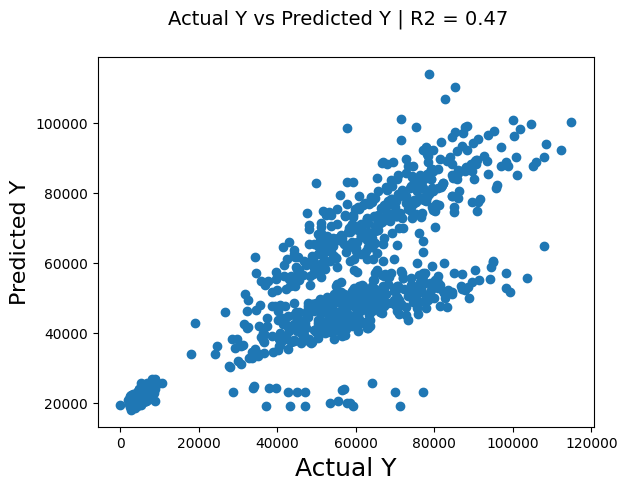

In [ ]:
# Plotting a graph for actual vs predicted values
predict_reg_model_1a = reg_model_1a.predict(df_limpio)
fig = plt.figure()
plt.scatter(Y, predict_reg_model_1a)
fig.suptitle('Actual Y vs Predicted Y | R2 = 0.47', fontsize = 14)
plt.xlabel('Actual Y', fontsize = 18)
plt.ylabel('Predicted Y', fontsize = 16)
plt.show()

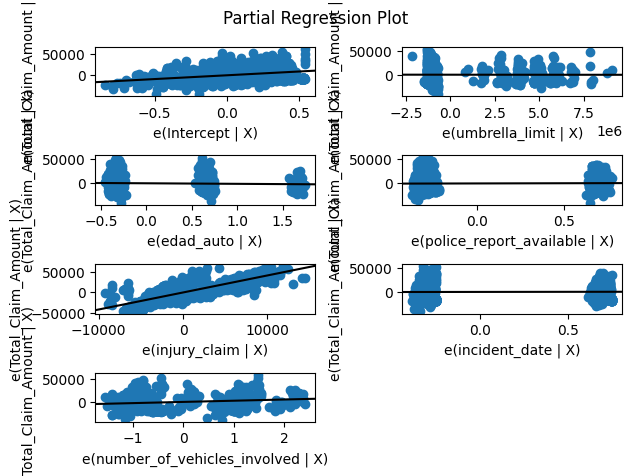

In [ ]:
fig = sm.graphics.plot_partregress_grid(polynomial_model)
fig.tight_layout(pad=1.0)

<Axes: xlabel='injury_claim', ylabel='Total Claim Amount'>

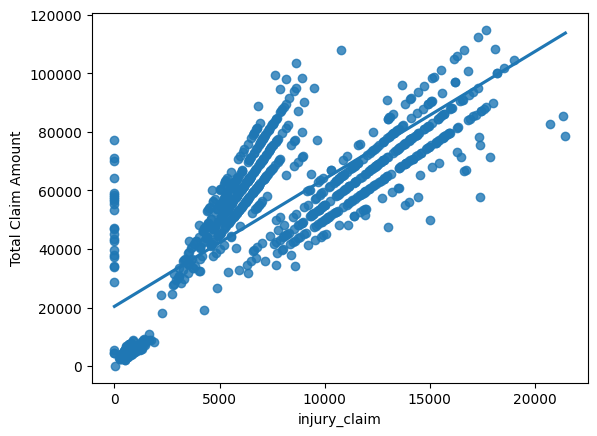

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x = "injury_claim", y = "Total Claim Amount",  ci = None, data = polynomial_data)

## XGBOOST REGRESSION

In [ ]:
# XGBoost Regression Prediction
import xgboost as xgb

xgboost_model = xgb.XGBRegressor(objective='reg:linear')
xgboost_model = xgb.XGBRegressor(max_depth=4, n_estimators=500, objective='reg:linear')
xgboost_model.fit(X, Y)
xgboost_predictions = xgboost_model.predict(X)

In [ ]:
# XGBoost Regression Model - Evaluate the model
xgboost_rmse = mean_squared_error(Y, xgboost_predictions, squared = False)
xgboost_rmse
# xgboost_r2 = r2_score(Y, xgboost_predictions)

4218.312475385387

In [ ]:
# XGBoost Regression Model - Displaying Feature Importance Scores
feature_importance = xgboost_model.feature_importances_
feature_importance

array([0.65964204, 0.06838751, 0.04809659, 0.04740115, 0.12524037,
       0.05123236], dtype=float32)

In [ ]:
# XGBoost Regression Model - Displaying Feature Importance Scores
xgboost_feature_importance = pd.DataFrame({'importance':xgboost_model.feature_importances_,'feature':X.columns})
xgboost_feature_importance.sort_values('importance', ascending=False)

,importance,feature
0,0.659642,injury_claim
4,0.125240,number_of_vehicles_involved
1,0.068388,police_report_available
5,0.051232,incident_date
2,0.048097,umbrella_limit
3,0.047401,edad_auto


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV # GridSearchCV is one of the most widely used techniques for hyperparameter tuning. It involves specifying a set of possible values for each hyperparameter, and then training and evaluating the model for each combination of hyperparameter values.

param_grid = {

    'learning_rate': [0.1, 0.15, 0.25],

    'max_depth': [4, 6, 8],

    'min_child_weight': [1, 3, 5],

    'subsample': [0.8, 0.9, 1.0]

}

grid_search = GridSearchCV(XGBRegressor(), param_grid, cv=3)
grid_search.fit(X,Y)
best_params = grid_search.best_params_

In [ ]:
# Hyperparameter Tunining of XGBoost model
xgb_model = XGBRegressor(**best_params)
xgb_model.fit(X,Y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgboost_fi = pd.DataFrame({'importance':xgb_model.feature_importances_,'feature':X.columns})
xgboost_fi.sort_values('importance', ascending=False)

,importance,feature
0,0.700713,injury_claim
4,0.188020,number_of_vehicles_involved
5,0.031413,incident_date
2,0.030053,umbrella_limit
1,0.028733,police_report_available
3,0.021067,edad_auto


Text(0, 0.5, 'Variables Name')

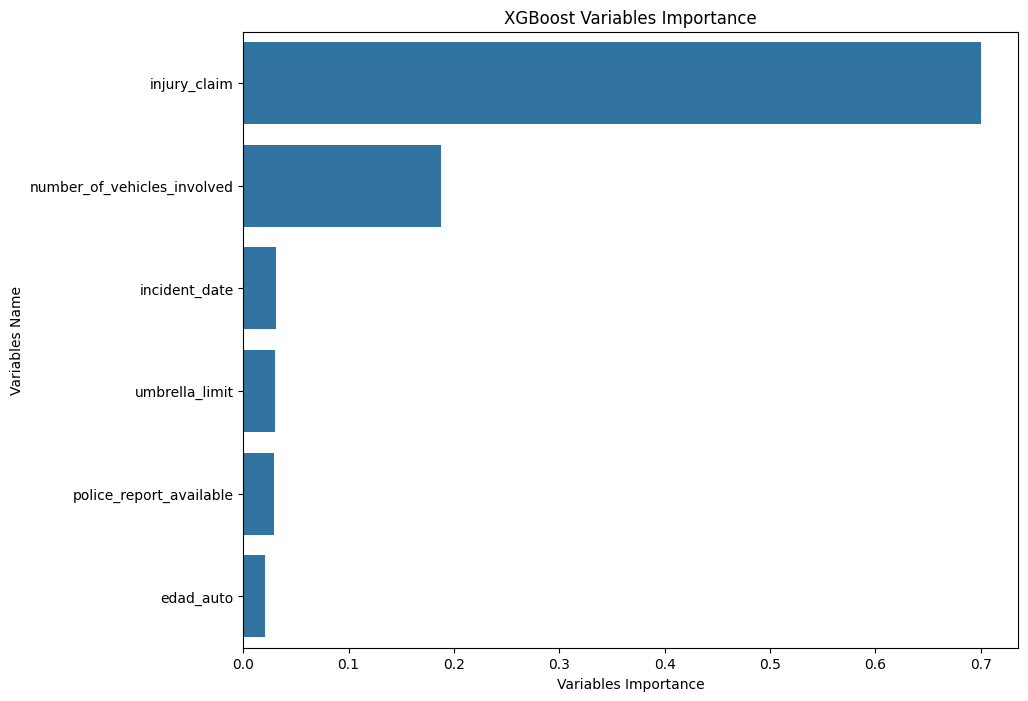

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x=xgboost_fi['importance'], y=xgboost_fi['feature'],order=xgboost_fi.sort_values('importance', ascending=False)['feature'])
plt.title('XGBoost Variables Importance')
plt.xlabel('Variables Importance')
plt.ylabel('Variables Name')

In [ ]:
XGBoost_hyp_rmse = np.sqrt(mean_squared_error(Y,xgb_model.predict(X)))
XGBoost_hyp_rmse

7915.024523646831

#Modelos para detectar Multicolinealidad

In [ ]:

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Selecting numeric features relevant for multicollinearity check
numeric_features = [
    'months_as_customer', 'age', 'policy_deductable',
    'policy_annual_premium', 'umbrella_limit',
    'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
    'number_of_vehicles_involved', 'bodily_injuries',
    'total_claim_amount', 'injury_claim', 'property_claim',
    'vehicle_claim'
]

# Subset the dataframe with only numeric features
X = df[numeric_features]

# Add a constant (intercept term) to the model
X = sm.add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF data
print(vif_data)


                        feature        VIF
0                         const  90.967404
1            months_as_customer   6.785427
2                           age   6.779287
3             policy_deductable   1.015909
4         policy_annual_premium   1.009748
5                umbrella_limit   1.006682
6                 capital-gains   1.014527
7                  capital-loss   1.008012
8      incident_hour_of_the_day   1.045365
9   number_of_vehicles_involved   1.098431
10              bodily_injuries   1.009332
11           total_claim_amount        inf
12                 injury_claim        inf
13               property_claim        inf
14                vehicle_claim        inf


### Evaluación y Selección de Modelo de Regresión

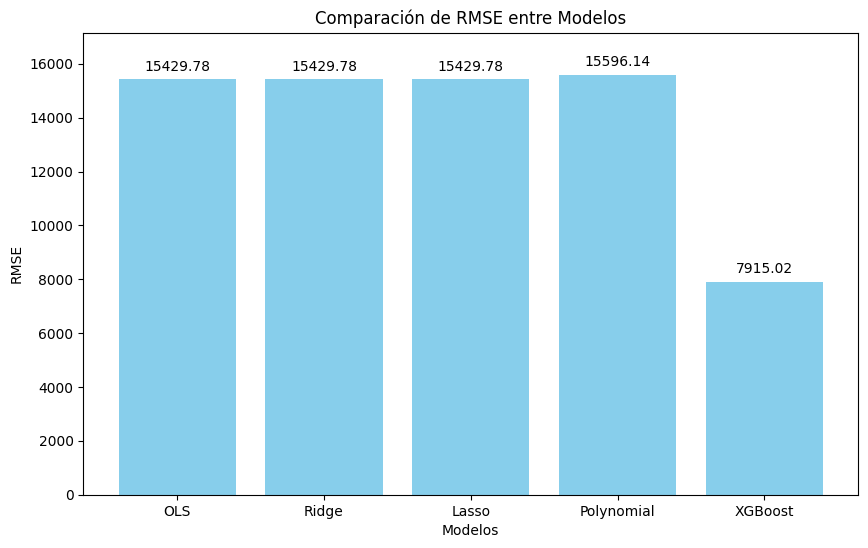

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
model_names = ['OLS', 'Ridge', 'Lasso', 'Polynomial', 'XGBoost']

rmse_values = [OLS_rmse, RIDGE_rmse, LASSO_rmse, Polynomial_rmse, XGBoost_hyp_rmse]

plt.figure(figsize=(10, 6))
plt.bar(model_names, rmse_values, color='skyblue')

plt.xlabel('Modelos')
plt.ylabel('RMSE')
plt.title('Comparación de RMSE entre Modelos')
plt.ylim(0, max(rmse_values) * 1.1)

for i, v in enumerate(rmse_values):
    plt.text(i, v + 200, f"{v:.2f}", ha='center', va='bottom')

plt.show()


Finalmente, se presenta una breve descripción de los principales hallazgos del Análisis Exploratorio de Datos (EDA) basado en las estadísticas descriptivas de las variables:

1. Antigüedad de la póliza: Los asegurados con una antigüedad de entre 220 y 280 meses presentan una mayor frecuencia de siniestros, mientras que aquellos con más de 300 meses muestran una menor probabilidad de accidentes.

2. Edad del vehículo: Los vehículos SUV tienden a generar los reclamos de mayor costo, especialmente en el rango de 40,000 a 50,000 pesos, mientras que los sedanes y vehículos familiares suelen estar por debajo de los 60,000 pesos.

3. Incidencia de reclamos según el tipo de vehículo: Los SUV destacan por una mayor incidencia de reclamos por daños a terceros, con montos que superan en un 20% el promedio general, mientras que los vehículos compactos tienen la menor frecuencia y costos de reparación más bajos.

4. Correlación entre reclamos: Existe una correlación significativa entre los reclamos por daños a la propiedad y los reclamos por lesiones, con un monto promedio de los reclamos por lesiones inferior a 10,000 pesos.

5. Fraude en los reclamos: La variable "fraud_reported" muestra una correlación notable con la variable explicativa "total_claim_amount", lo que sugiere que los montos de reclamos son mayores en casos de fraude.

6. Desviaciones significativas en los datos: Variables como "policy_number" y "umbrella_limit" presentan una alta varianza, indicando una gran dispersión en los datos, mientras que variables como "collision_type" y "property_damage" tienen desviaciones estándar de cero, lo que indica falta de variabilidad.

7. Impacto de la educación del asegurado: El nivel educativo del asegurado muestra una distribución bastante uniforme, sin una tendencia clara, lo que podría influir en la evaluación de riesgos y primas.

8. Distribución horaria de los incidentes: La mayoría de los incidentes se concentran en ciertas horas del día, con un pico en las primeras horas, lo que podría ser relevante para la evaluación del riesgo temporal.

9. Reclamos por tipo de daño: Los reclamos por daños al vehículo representan la mayor parte del total de reclamos, con montos promedio que varían significativamente según el tipo de vehículo y el contexto del siniestro.

10. Tendencias en los reclamos: Se observan patrones claros en la frecuencia y el monto de los reclamos según la antigüedad del cliente y del vehículo, lo que puede ayudar a predecir futuros siniestros y ajustar las políticas de aseguramiento.

#### Selección del Mejor Modelo

Basándonos en los valores de RMSE, el modelo XGBoost es claramente el mejor de los cinco. Su RMSE es significativamente menor que el de los otros modelos, lo que indica que, en promedio, las predicciones del modelo XGBoost están mucho más cerca de los valores reales.

De acuerdo con la gráfica, las variables que más contribuyen a explicar los cambios en el monto total del reclamo son:

1. injury_claim: La variable "Injury Claim" es, por mucho, la variable más importante. Esto sugiere que la gravedad de las lesiones tiene un impacto directo y significativo en el costo total del reclamo.
2. number_of_vehicles_involved: El número de vehículos involucrados en el accidente también es un factor determinante en el monto total del reclamo. Cuantos más vehículos estén involucrados, mayor tiende a ser el costo de reparación y los reclamos asociados.

En conclusion, todos los modelos logran explicar una porción considerable de la variabilidad en el monto total del reclamo. Esto indica que las variables incluidas en el modelo son relevantes y contribuyen a la predicción del valor objetivo. Sin embargo, aunqeu todos los modelos evaluados proporcionan resultados razonables, el modelo XGBoost se destaca por su mayor precisión y capacidad para capturar relaciones más complejas entre las variables. Esto lo convierte en la mejor opción para predecir el monto total del reclamo en este caso particular.